<h1>Example Artificial Neural Network</h1>

Refencence: 
    
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html



In [ ]:
# Example Neural Nework using Numpy
import numpy as np 

N = 64      # batch_size
D_in = 1000 # input_dim
H = 100     # hidden size
D_out = 10  # output_dim

x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

In [21]:
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

In [22]:
lr = 1e-6   # learning_rate

In [23]:
losses = []

for t in range(500):
    # Forward pass: compute predicted y
    h = x.dot(w1)    # x[N, D_in], w1[D_in, H], h[N, H]
    h_relu = np.maximum(h, 0)  # h_relu[N, H]
    y_pred = h_relu.dot(w2)    # y_pred[N, D_out]
    
    # Compute loss
    loss = np.square(y_pred - y).sum()
    
    losses.append(loss)
    
    # Backward pass: compute gradients of weigths: w1, w2
    ## d(loss)/d(y_pred), [N, D_out]
    grad_y_pred = 2.0 * (y_pred - y) 
    
    """
    d(loss)/d(y_pred) * d(y_pred)/d(w_2)
    =  h_relu.T * grad_y_pred 
    """
    grad_w2 = h_relu.T.dot(grad_y_pred) # [H, D_out]
    
    grad_h_relu = grad_y_pred.dot(w2.T) # [N, H]
    
    grad_h = grad_h_relu.copy()
    # grad_h = grad_h_relu * 1
    grad_h[h < 0] = 0                   # [N, H]
    
    grad_w1 = x.T.dot(grad_h)           # [D_in, H]
    
    # Update weights
    w1 -= lr * grad_w1
    w2 -= lr * grad_w2

In [24]:
from matplotlib import pyplot as plt

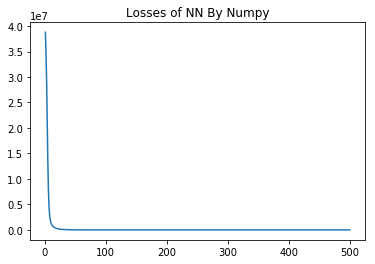

In [42]:
x = np.arange(1, 501, 1)
plt.plot(x, losses)
plt.title('Losses of NN By Numpy')
plt.show()

In [37]:
# Example Neural Network using PyTorch

import torch as torch 

dtype = torch.float
device = torch.device("cpu")

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

In [39]:
lr = 1e-6

losses = []

for _ in range(500):
    # Forward pass
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    
    # Compute loss
    loss = (y_pred - y).pow(2).sum().item()
    losses.append(loss)
    
    # Backprop to compute gradient of weights
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    # Update weights
    w1 -= lr * grad_w1
    w2 -= lr * grad_w2

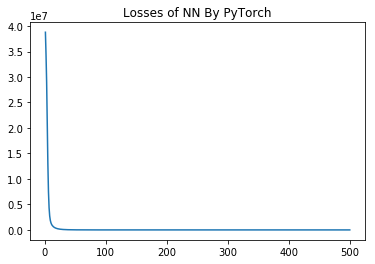

In [41]:
plt.plot(np.arange(1, 501, 1), losses)
plt.title('Losses of NN By PyTorch')
plt.show()

In [45]:
# Example Neural Network Using PyTorch AutoGrad

import torch as torch 

dtype = torch.float
device = torch.device("cpu")

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

w1 = torch.randn(D_in, H, device=device, dtype=dtype, 
                 requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, 
                requires_grad=True)

lr = 1e-6

losses = []

for _ in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    
    loss = (y_pred - y).pow(2).sum()
    losses.append(loss)
    
    loss.backward()
    
    with torch.no_grad():
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad
        
        w1.grad.zero_()
        w2.grad.zero_()

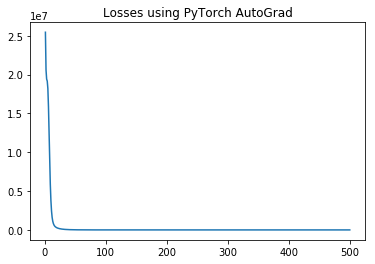

In [46]:
plt.plot(np.arange(1, 501, 1), losses)
plt.title('Losses using PyTorch AutoGrad')
plt.show()

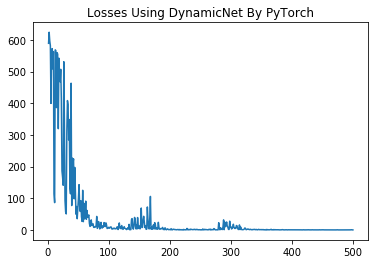

In [48]:
import torch
import random
from matplotlib import pyplot as plt
import numpy as np

random.seed(20170430)

class DynamicNet(torch.nn.Module):

    def __init__(self, D_in, H, D_out):
        super(DynamicNet, self).__init__()
        self.input_linear = torch.nn.Linear(D_in, H)
        self.middle_linear = torch.nn.Linear(H, H)
        self.output_linear = torch.nn.Linear(H, D_out)

    def forward(self, x):
        h_relu = self.input_linear(x)

        for _ in range(random.randint(0, 3)):
            h_relu = self.middle_linear(h_relu).clamp(min=0)

        y_pred = self.output_linear(h_relu)

        return y_pred

def main():

    N, D_in, H, D_out = 64, 1000, 100, 10

    x = torch.randn(N, D_in)
    y = torch.randn(N, D_out)

    model = DynamicNet(D_in, H, D_out)

    criterion = torch.nn.MSELoss(reduction='sum')
    optimizer = torch.optim.SGD(model.parameters(),
                                lr=1e-4,
                                momentum=0.9)

    losses = []
    for t in range(500):
        # Forward pass
        y_pred = model(x)

        loss = criterion(y_pred, y)
        losses.append(loss)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    plt.plot(np.arange(1, 501, 1), losses)
    plt.title("Losses Using DynamicNet By PyTorch")
    plt.show()


if __name__ == '__main__':
    main()